In [1]:
!pip install sdv

In [2]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.lite import SingleTablePreset

In [3]:
expandedwithGAN_dataset = pd.read_excel("Pre-ProcessedafterScalingandEncoding_OL_ST_R.xlsx")

In [4]:
expandedwithGAN_dataset = expandedwithGAN_dataset.drop(columns=['Drug Name'], errors='ignore')

In [5]:
if 'expired date' in expandedwithGAN_dataset.columns:
    expandedwithGAN_dataset['expired_month'] = pd.to_datetime(expandedwithGAN_dataset['expired date'], errors='coerce').dt.month
    expandedwithGAN_dataset['expired_year'] = pd.to_datetime(expandedwithGAN_dataset['expired date'], errors='coerce').dt.year
    expandedwithGAN_dataset = expandedwithGAN_dataset.drop(columns=['expired date'])

In [6]:
expandedwithGAN_dataset = expandedwithGAN_dataset.drop(columns=['synthetic'], errors='ignore')
expandedwithGAN_dataset.dropna(inplace=True)

In [7]:
metadata_dataset = SingleTableMetadata()
metadata_dataset.detect_from_dataframe(data=expandedwithGAN_dataset)

In [8]:
model_dataset = SingleTablePreset(metadata=metadata_dataset, name='FAST_ML')
model_dataset.fit(expandedwithGAN_dataset)

D:\Downloads\Anaconda\Lib\site-packages\sdv\lite\single_table.py:52: FutureWarning: The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
D:\Downloads\Anaconda\Lib\site-packages\sdv\lite\single_table.py:61: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(META_DEPRECATION_MSG, FutureWarning)
D:\Downloads\Anaconda\Lib\site-packages\sdv\single_table\base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
D:\Downloads\Anaconda\Lib\site-packages\sdv\single_table\base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sdv\lite\single_table.py:88: FutureWarning

In [9]:
synthetic_dataset = model_dataset.sample(200)
synthetic_dataset['synthetic'] = 1
expandedwithGAN_dataset['synthetic'] = 0

D:\Downloads\Anaconda\Lib\site-packages\sdv\lite\single_table.py:109: FutureWarning: The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


In [10]:
combinedwithGAN_dataset = pd.concat([expandedwithGAN_dataset, synthetic_dataset], ignore_index=True)

In [11]:
combinedwithGAN_dataset.to_excel("Expanded_ST_R_With_GAN.xlsx", index=False)

print("✅ Synthetic data generated using SDV and merged with real data. Saved as 'Expanded_ST_R_With_GAN.xlsx'")

✅ Synthetic data generated using SDV and merged with real data. Saved as 'Expanded_ST_R_With_GAN.xlsx'


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

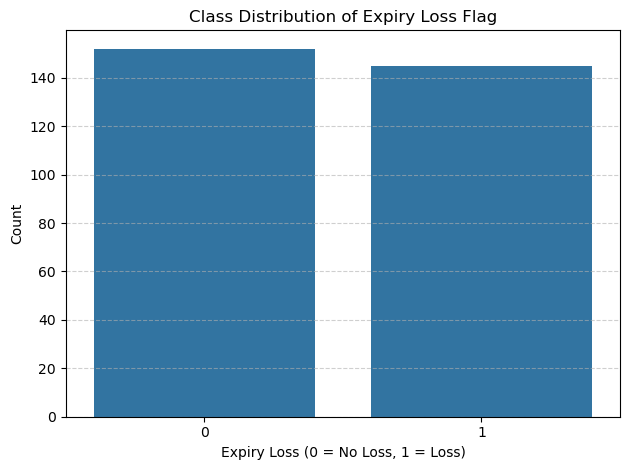

In [13]:
sns.countplot(data=combinedwithGAN_dataset, x='expiry_loss_flag')
plt.title("Class Distribution of Expiry Loss Flag")
plt.xlabel("Expiry Loss (0 = No Loss, 1 = Loss)")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()